# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

## Paso 1: Distribución de la variable objetivo (fraud)

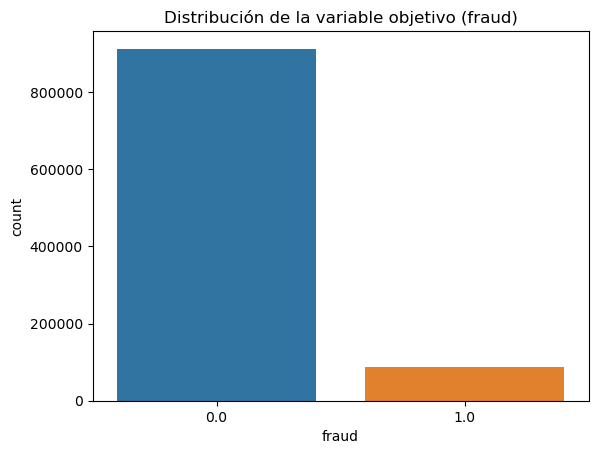

fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64


In [3]:
# Ver la distribución de la variable 'fraud'
fraud_counts = fraud['fraud'].value_counts(normalize=True)

# Visualización
sns.countplot(x='fraud', data=fraud)
plt.title('Distribución de la variable objetivo (fraud)')
plt.show()

print(fraud_counts)

## Paso 2: Entrenar un modelo de Regresión Logística

In [4]:
# Separar características (X) y la variable objetivo (y)
X = fraud.drop(columns=['fraud'])
y = fraud['fraud']

# Dividir en conjunto de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos (ya que algunos valores tienen diferentes escalas)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de Regresión Logística
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de prueba
y_pred = log_reg.predict(X_test_scaled)

## Paso 3: Evaluar el modelo

In [5]:
# Matriz de confusión
print(confusion_matrix(y_test, y_pred))

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Calcular el AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {roc_auc:.4f}")

[[181283   1274]
 [  6976  10467]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182557
         1.0       0.89      0.60      0.72     17443

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000

AUC-ROC: 0.7965


## Paso 4: Sobremuestreo (Oversampling) con RandomOverSampler

In [6]:
# Aplicar Oversampling al conjunto de entrenamiento
oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train_scaled, y_train)

# Entrenar nuevamente el modelo de Regresión Logística con datos balanceados
log_reg.fit(X_train_over, y_train_over)

# Predicciones en el conjunto de prueba
y_pred_over = log_reg.predict(X_test_scaled)

# Evaluación del modelo con Oversampling
print("Evaluación con Oversampling")
print(confusion_matrix(y_test, y_pred_over))
print(classification_report(y_test, y_pred_over))

# Calcular el AUC-ROC
roc_auc_over = roc_auc_score(y_test, y_pred_over)
print(f"AUC-ROC con Oversampling: {roc_auc_over:.4f}")

Evaluación con Oversampling
[[170347  12210]
 [   852  16591]]
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

AUC-ROC con Oversampling: 0.9421


## Paso 5: Submuestreo (Undersampling) con RandomUnderSampler

In [7]:
# Aplicar Undersampling al conjunto de entrenamiento
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train_scaled, y_train)

# Entrenar nuevamente el modelo con datos balanceados por Undersampling
log_reg.fit(X_train_under, y_train_under)

# Predicciones en el conjunto de prueba
y_pred_under = log_reg.predict(X_test_scaled)

# Evaluación del modelo con Undersampling
print("Evaluación con Undersampling")
print(confusion_matrix(y_test, y_pred_under))
print(classification_report(y_test, y_pred_under))

# Calcular el AUC-ROC
roc_auc_under = roc_auc_score(y_test, y_pred_under)
print(f"AUC-ROC con Undersampling: {roc_auc_under:.4f}")

Evaluación con Undersampling
[[170295  12262]
 [   842  16601]]
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

AUC-ROC con Undersampling: 0.9423


## Paso 6: Balanceo con SMOTE

In [8]:
# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Entrenar nuevamente el modelo con datos balanceados por SMOTE
log_reg.fit(X_train_smote, y_train_smote)

# Predicciones en el conjunto de prueba
y_pred_smote = log_reg.predict(X_test_scaled)

# Evaluación del modelo con SMOTE
print("Evaluación con SMOTE")
print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))

# Calcular el AUC-ROC
roc_auc_smote = roc_auc_score(y_test, y_pred_smote)
print(f"AUC-ROC con SMOTE: {roc_auc_smote:.4f}")

Evaluación con SMOTE
[[170334  12223]
 [   848  16595]]
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

AUC-ROC con SMOTE: 0.9422
